# EDA 

In [1]:
import pandas as pd 

fraud_data = pd.read_csv("/Users/michaelhirschberger/Documents/Vehicle Insurance Claim Fraud Detection/fraud_oracle.csv")

In [2]:
fraud_data.head()

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,...,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,...,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,...,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,...,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,...,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision


In [3]:
fraud_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15420 entries, 0 to 15419
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Month                 15420 non-null  object
 1   WeekOfMonth           15420 non-null  int64 
 2   DayOfWeek             15420 non-null  object
 3   Make                  15420 non-null  object
 4   AccidentArea          15420 non-null  object
 5   DayOfWeekClaimed      15420 non-null  object
 6   MonthClaimed          15420 non-null  object
 7   WeekOfMonthClaimed    15420 non-null  int64 
 8   Sex                   15420 non-null  object
 9   MaritalStatus         15420 non-null  object
 10  Age                   15420 non-null  int64 
 11  Fault                 15420 non-null  object
 12  PolicyType            15420 non-null  object
 13  VehicleCategory       15420 non-null  object
 14  VehiclePrice          15420 non-null  object
 15  FraudFound_P          15420 non-null

In [4]:
fraud_data.columns

Index(['Month', 'WeekOfMonth', 'DayOfWeek', 'Make', 'AccidentArea',
       'DayOfWeekClaimed', 'MonthClaimed', 'WeekOfMonthClaimed', 'Sex',
       'MaritalStatus', 'Age', 'Fault', 'PolicyType', 'VehicleCategory',
       'VehiclePrice', 'FraudFound_P', 'PolicyNumber', 'RepNumber',
       'Deductible', 'DriverRating', 'Days_Policy_Accident',
       'Days_Policy_Claim', 'PastNumberOfClaims', 'AgeOfVehicle',
       'AgeOfPolicyHolder', 'PoliceReportFiled', 'WitnessPresent', 'AgentType',
       'NumberOfSuppliments', 'AddressChange_Claim', 'NumberOfCars', 'Year',
       'BasePolicy'],
      dtype='object')

In [5]:
fraud_data['Date'] = pd.to_datetime(fraud_data['Month'] + ' ' + fraud_data['Year'].apply(str))

In [6]:
fraud_data.head()

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy,Date
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,...,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability,1994-12-01
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,...,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision,1994-01-01
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,...,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision,1994-10-01
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,...,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability,1994-06-01
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,...,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision,1994-01-01


In [7]:
%%time
import seaborn as sns



CPU times: user 397 ms, sys: 79.6 ms, total: 476 ms
Wall time: 1.21 s


In [8]:
fraud_data['FraudFound_P'].value_counts()

0    14497
1      923
Name: FraudFound_P, dtype: int64

In [9]:
fraudulent_claims = fraud_data[fraud_data['FraudFound_P'] == 1]

In [10]:
fraudulent_claims.shape

(923, 34)

Urban    0.896368
Rural    0.103632
Name: AccidentArea, dtype: float64

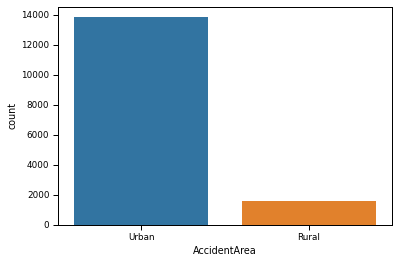

In [55]:
sns.countplot(x=fraud_data['AccidentArea'])
fraud_data['AccidentArea'].value_counts(normalize=True)

Urban    0.855905
Rural    0.144095
Name: AccidentArea, dtype: float64

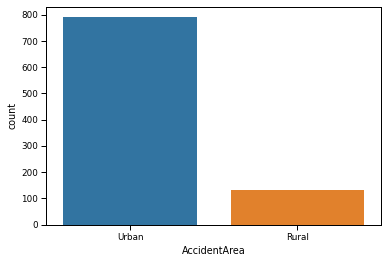

In [57]:
sns.countplot(x=fraudulent_claims['AccidentArea'])
fraudulent_claims['AccidentArea'].value_counts(normalize=True)

Male      0.843061
Female    0.156939
Name: Sex, dtype: float64

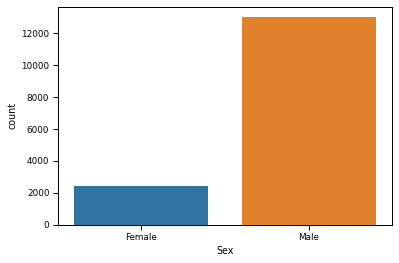

In [58]:
sns.countplot(x=fraud_data['Sex'])
fraud_data['Sex'].value_counts(normalize=True)

Male      0.886241
Female    0.113759
Name: Sex, dtype: float64

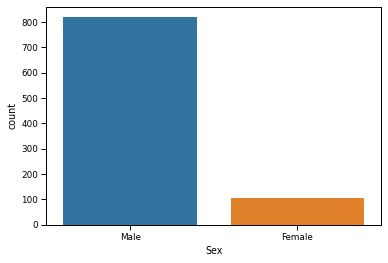

In [59]:
sns.countplot(x=fraudulent_claims['Sex'])
fraudulent_claims['Sex'].value_counts(normalize=True)

Married     0.689040
Single      0.303761
Divorced    0.004929
Widow       0.002270
Name: MaritalStatus, dtype: float64

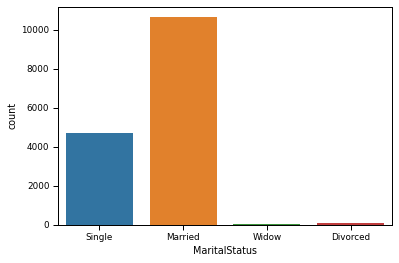

In [60]:
sns.countplot(x=fraud_data['MaritalStatus'])
fraud_data['MaritalStatus'].value_counts(normalize=True)

Married     0.692308
Single      0.301192
Divorced    0.003250
Widow       0.003250
Name: MaritalStatus, dtype: float64

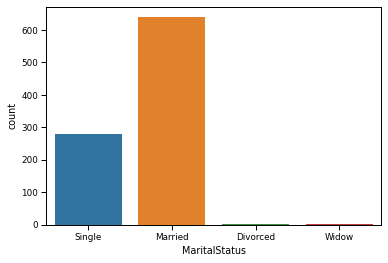

In [61]:
sns.countplot(x=fraudulent_claims['MaritalStatus'])
fraudulent_claims['MaritalStatus'].value_counts(normalize=True)

38.0

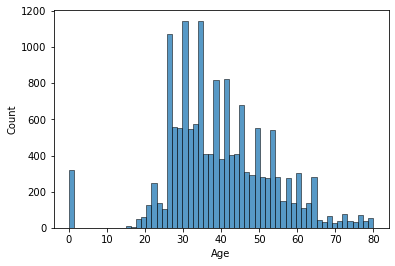

In [17]:
sns.histplot(fraud_data['Age'])
fraud_data['Age'].median()

36.0

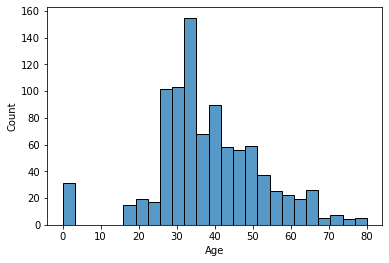

In [18]:
sns.histplot(fraudulent_claims['Age'])
fraudulent_claims['Age'].median()

In [36]:
claims_per_month = fraud_data.groupby(pd.Grouper(key='Date', axis=0, freq='M')).size()
fraud_claims_per_month = fraudulent_claims.groupby(pd.Grouper(key='Date', axis=0, freq='M')).size()

In [44]:
monthly_claims_plot = pd.DataFrame({"Num Claims per Month": claims_per_month, "Num Fraudulent Claims per Month": fraud_claims_per_month})

In [45]:
monthly_claims_plot

,Num Claims per Month,Num Fraudulent Claims per Month
Date,,
1994-01-31,608,48
1994-02-28,528,36
1994-03-31,584,56
1994-04-30,533,47
1994-05-31,569,52
1994-06-30,543,47
1994-07-31,495,32
1994-08-31,470,56
1994-09-30,441,9


<AxesSubplot:xlabel='Date', ylabel='Num Claims per Month'>

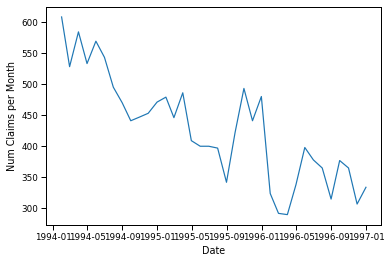

In [85]:
import matplotlib.pyplot as plt
sns.lineplot(data=monthly_claims_plot['Num Claims per Month'])

<AxesSubplot:xlabel='Date', ylabel='Num Fraudulent Claims per Month'>

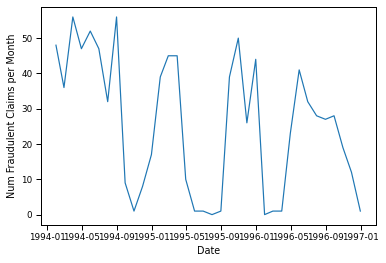

In [86]:
sns.lineplot(data=monthly_claims_plot['Num Fraudulent Claims per Month'])

In [73]:
fraud_data.corr()

,WeekOfMonth,WeekOfMonthClaimed,Age,FraudFound_P,PolicyNumber,RepNumber,Deductible,DriverRating,Year
WeekOfMonth,1.000000,0.275400,-0.004810,-0.011861,-0.007797,0.005283,-0.003993,-0.016817,-0.003906
WeekOfMonthClaimed,0.275400,1.000000,0.001859,-0.005761,0.011665,0.008908,0.005457,-0.000048,0.012175
Age,-0.004810,0.001859,1.000000,-0.029741,0.025944,-0.007063,0.069420,0.001668,0.025197
FraudFound_P,-0.011861,-0.005761,-0.029741,1.000000,-0.020345,-0.007551,0.017348,0.007266,-0.024760
PolicyNumber,-0.007797,0.011665,0.025944,-0.020345,1.000000,0.008990,0.002133,-0.012312,0.936513
RepNumber,0.005283,0.008908,-0.007063,-0.007551,0.008990,1.000000,0.000509,0.011031,0.009338
Deductible,-0.003993,0.005457,0.069420,0.017348,0.002133,0.000509,1.000000,0.003886,-0.001170
DriverRating,-0.016817,-0.000048,0.001668,0.007266,-0.012312,0.011031,0.003886,1.000000,-0.013890
Year,-0.003906,0.012175,0.025197,-0.024760,0.936513,0.009338,-0.001170,-0.013890,1.000000
